In [1]:
import numpy as np 
import os
import cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Dropout
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

In [2]:
X_train = []
Y_train = []
image_size = 150
labels = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

Load Training Data

In [3]:
for i in labels:
    folderPath = os.path.join('D:\\brain tumor detection\\archive\\Training', i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath, j))
        img = cv2.resize(img, (image_size, image_size))
        X_train.append(img)
        Y_train.append(i)

Load Testing Data

In [4]:
for i in labels:
    folderPath = os.path.join('D:\\brain tumor detection\\archive\\Testing', i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath, j))
        img = cv2.resize(img, (image_size, image_size))
        X_train.append(img)
        Y_train.append(i)

In [5]:
X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_train, Y_train = shuffle(X_train, Y_train, random_state=101)

Train-Test Split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.1, random_state=101)

Convert Labels to Categorical

In [7]:
y_train_new = [labels.index(i) for i in y_train]
y_train = tf.keras.utils.to_categorical(y_train_new)

In [8]:
y_test_new = [labels.index(i) for i in y_test]
y_test = tf.keras.utils.to_categorical(y_test_new)

Convolutional Neural Network

In [9]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.3))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(4, activation='softmax'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 73, 73, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 73, 73, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 69, 69, 64)        36928     
                                                        

Compile the Model

In [11]:
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

Train the Model

In [12]:
history = model.fit(X_train, y_train, epochs=20, validation_split=0.1)

Epoch 1/20
83/83 [==============================] - 466s 5s/step - loss: 2.0154 - accuracy: 0.2785 - val_loss: 1.3618 - val_accuracy: 0.2891
Epoch 2/20
83/83 [==============================] - 431s 5s/step - loss: 1.3371 - accuracy: 0.3125 - val_loss: 1.2982 - val_accuracy: 0.4116
Epoch 3/20
83/83 [==============================] - 432s 5s/step - loss: 1.1411 - accuracy: 0.4801 - val_loss: 1.1022 - val_accuracy: 0.5170
Epoch 4/20
83/83 [==============================] - 429s 5s/step - loss: 1.0113 - accuracy: 0.5543 - val_loss: 0.9266 - val_accuracy: 0.5680
Epoch 5/20
83/83 [==============================] - 431s 5s/step - loss: 0.8812 - accuracy: 0.6092 - val_loss: 1.0504 - val_accuracy: 0.5204
Epoch 6/20
83/83 [==============================] - 431s 5s/step - loss: 0.7751 - accuracy: 0.6727 - val_loss: 0.7317 - val_accuracy: 0.6463
Epoch 7/20
83/83 [==============================] - 428s 5s/step - loss: 0.6637 - accuracy: 0.7317 - val_loss: 0.6841 - val_accuracy: 0.6803
Epoch 8/20
83

Plot Training History

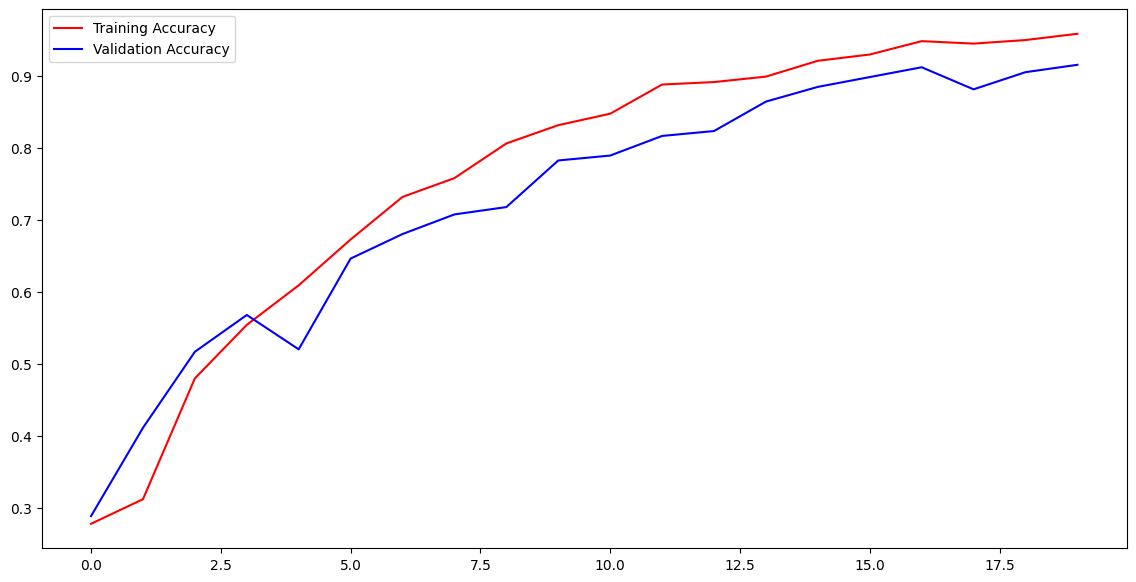

In [13]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14, 7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

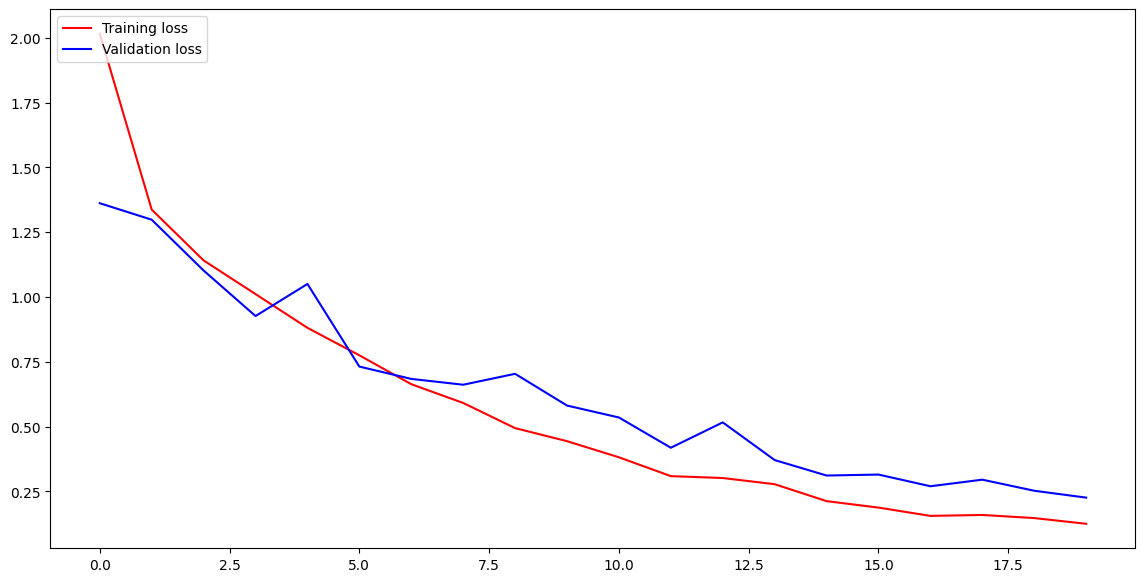

In [14]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14, 7))
plt.plot(epochs, loss, 'r', label="Training loss")
plt.plot(epochs, val_loss, 'b', label="Validation loss")
plt.legend(loc='upper left')
plt.show()

Predict on First Image

In [15]:
img = cv2.imread("D:\\brain tumor detection\\archive\\Training\\glioma_tumor\\gg (777).jpg")
img = cv2.resize(img, (150, 150))
img_array = np.array(img)
img_array = img_array.reshape(1, 150, 150, 3)

Visualize the Image

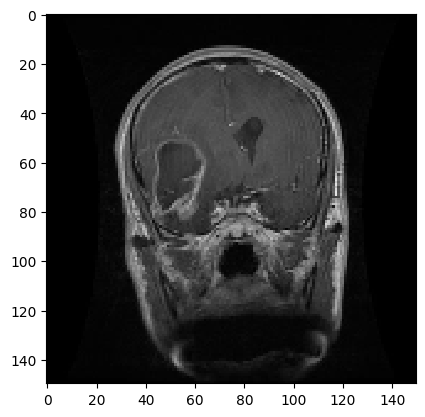

In [16]:
plt.imshow(img, interpolation='nearest')
plt.show()

Make Predictions

In [17]:
predictions = model.predict(img_array)
indices = np.argmax(predictions)
print(indices)

1/1 [==============================] - 1s 1s/step
0


Predict on Second Image

In [18]:
img = cv2.imread("D:\\brain tumor detection\\archive\\Training\\meningioma_tumor\\m (56).jpg")
img = cv2.resize(img, (150, 150))
img_array = np.array(img)
img_array = img_array.reshape(1, 150, 150, 3)

Visualize the Image

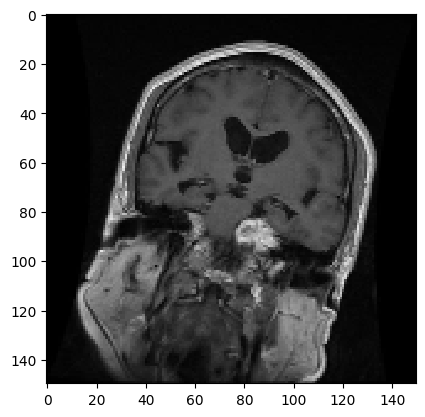

In [19]:
plt.imshow(img, interpolation='nearest')
plt.show()

Make Predictions

In [20]:
predictions = model.predict(img_array)
indices = np.argmax(predictions)
print(indices)

1/1 [==============================] - 0s 174ms/step
1


Predict on Third Image

In [30]:
img = cv2.imread("D:\\brain tumor detection\\archive\\Training\\no_tumor\\image (10).jpg")
img = cv2.resize(img, (150, 150))
img_array = np.array(img)
img_array = img_array.reshape(1, 150, 150, 3)

Visualize the Image

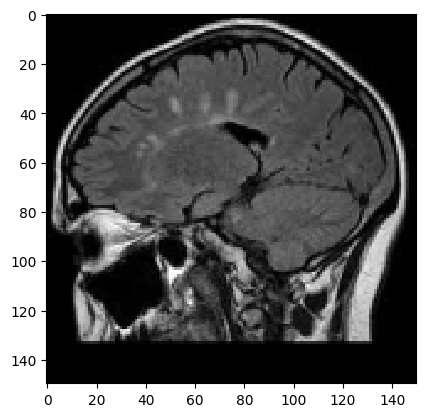

In [31]:
plt.imshow(img, interpolation='nearest')
plt.show()

Make Predictions

In [32]:
predictions = model.predict(img_array)
indices = np.argmax(predictions)
print(indices)

1/1 [==============================] - 0s 150ms/step
2


Predict on Fourth Image

In [33]:
img = cv2.imread("D:\\brain tumor detection\\archive\\Training\\pituitary_tumor\\p (107).jpg")
img = cv2.resize(img, (150, 150))
img_array = np.array(img)
img_array = img_array.reshape(1, 150, 150, 3)

Visualize the Image

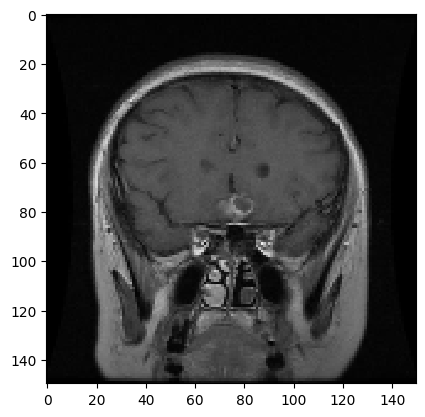

In [34]:
plt.imshow(img, interpolation='nearest')
plt.show()

Make Predictions

In [35]:
predictions = model.predict(img_array)
indices = np.argmax(predictions)
print(indices)

1/1 [==============================] - 0s 161ms/step
3
